## ESE 101: Programming Module 1
### Phenomena: Observed features of the atmospheric circulation
#### Dave Bonan, Jordan Benjamin, Tapio Schneider

In this module, you will learn how to read in an plot data of the atmosphere in **python**. We will use output from a state-of-the-art climate model ([CESM2](http://www.cesm.ucar.edu/models/cesm2/)).

You will need to have software installed to open, read, and run Jupyter notebooks such as this one. The best way to do this is to install Anaconda from: https://docs.anaconda.com/anaconda/install/. <br>
This should install [Jupyter](https://jupyter.org/)'s notebook software (e.g. this document) and JupyterLab software (a more complete IDE), but, should you need to install them individually, you can via https://jupyter.org/install. <br>
You can choose to intstall jupyterlab `conda install -c conda-forge jupyterlab`, or just the notebook `conda install -c conda-forge notebook`

An anaconda installation should have installed all the packages you need, but if you're missing any packages, you may need to run some or all of:

`
conda install matplotlib
conda install cartopy
conda install numpy
conda install math
conda install xarray
`

You will also need to (if not already installed) install the `nc-time-axis` package via: <br>
`conda install -c conda-forge nc-time-axis` <br>
to handle the time format conventions used in modern climate model datasets.

A few final notes:
- **Run cells in this notebook by pressing `Ctrl+Enter`**  (e.g., to fill in cells for answers marked `Answer:`)<br>
- **Double click markdown (text) cells to edit them**

In this notebook, all the code is pre-prepared and should work without adjustment. Future notebooks will require you to, where prompted, write some simple code, so do your best to understand the examples we have provided here! And don't forget to reach out to the TAs with any and all questions! Let's begin:

#### Import python packages required for this notebook:

In [1]:
import matplotlib as mpl        # Python's default plotting package https://matplotlib.org/
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs      # Mapping  package https://scitools.org.uk/cartopy/docs/latest/
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np              # Python's numerical and array calculations package https://numpy.org/
import math                     # Python's default math package https://docs.python.org/3/library/math.html
import xarray as xr             # Python package for labeled datasets and arrays

#### Define a function to plot data on a globe:

In [2]:
def cylindrical_equidistant_projection(lats,lons,data,ticks,c_ticks,cmap='RdYlBu_r',c_label='',title='',fig=None,ax=None):
    """
    A function to plot data on a globe
    """
    if fig is None:
        fig=plt.figure(figsize=(8, 5)) # initialize a figure
    
    lon2d, lat2d = np.meshgrid(lons, lats) # create 2D lat-lon grid
    if ax is None:
        ax = plt.axes(projection=ccrs.PlateCarree()) # create axes with assigned Plate Carree map projection
        
    ax.set_title(title,y=1.1) # add a plot title
    ax.set_global() # show the entire globe
    ax.coastlines() # plot coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
    gl.bottom_labels = False # do not label longitudes on bottom
    gl.right_labels  = False  # do not lobal latitudes on right
    gl.xformatter = LONGITUDE_FORMATTER # format in longitude format
    gl.yformatter = LATITUDE_FORMATTER  # format in latitude format

    cs=ax.contourf(lons, lats, data,ticks,cmap=cmap) # plot data
    
    # create colorbar
    cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.975) # add colorbar axes at bottom
    cbar=fig.colorbar(cs,cax=cax,orientation='horizontal',ticks=c_ticks)        # add horizontal colorbar to this axes
    cbar.set_label(c_label)                                                     # label colorbar

#### Now let's read monthly surface temperature from CESM2:

In [3]:
filepath = 'tas_Amon_CESM2_01_12_1981_2012.nc'  # choose this dataset, monthly surface temperature data
surface_temperature = xr.open_dataset(filepath) # open the file
surface_temperature                             # examine its data

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 288, time: 12)
Coordinates:
  * time      (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 ...
    lat_bnds  (lat, bnds) float64 ...
    tas       (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.7.1 (http://mp...
    history:                Tue Sep 22 16:45:35 2020: cdo -ymonmean /export/d...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:     

You'll note the data in `surface_temperature` is defined over several coordinates, `lat, lon, time` and the data variable we want is `tas`. We can access this variable with  `surface_temperature['tas']`.

#### Now let's plot annual-mean surface temperature, and describe it:

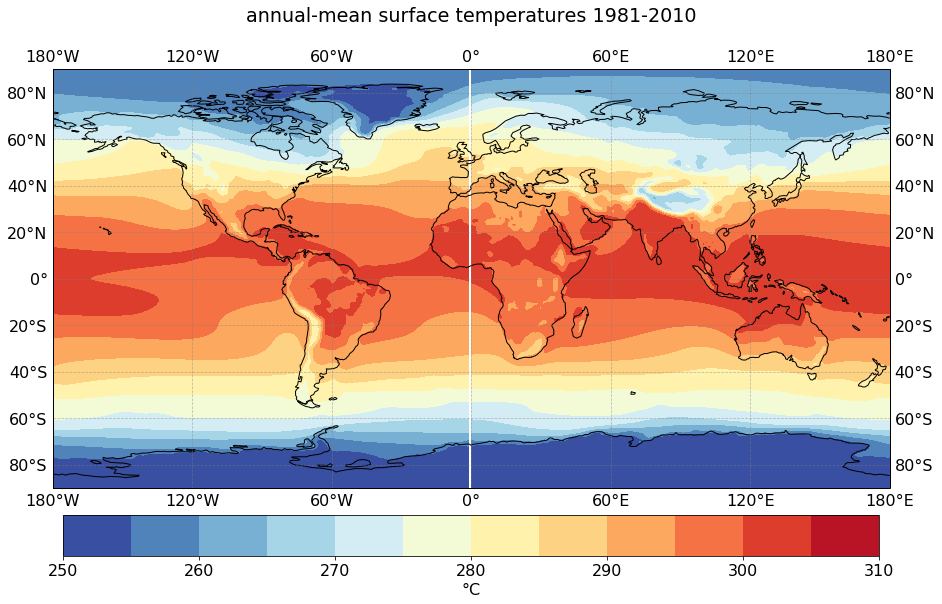

In [4]:
plt.rcParams.update({'font.size': 16})  # change the font size
fig = plt.figure(figsize=(15,10))       # initialize a fairly large figure
ann_mean = surface_temperature['tas'].mean('time') # take the mean of our data over the time axis
ann_mean = ann_mean.where(ann_mean > 250, 250) # replace values where ann_mean > 250 K is False (i.e. ann_mean < 250) with 250 (remove low outliers)
ann_mean = ann_mean.where(ann_mean < 310, 310) # replace values where ann_mean < 310 K is False (i.e. ann_mean > 310) with 310 (remove high outliers)
title = 'annual-mean surface temperatures 1981-2010'
cylindrical_equidistant_projection(surface_temperature['lat'],surface_temperature['lon'],ann_mean,np.arange(250,310.00001,5),np.arange(250,320,10),cmap='RdYlBu_r',c_label='°C',title=title,fig=fig) # plot

**Decribe features you see in the above plot.**

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>

#### Now let's take and plot some seasonal means:

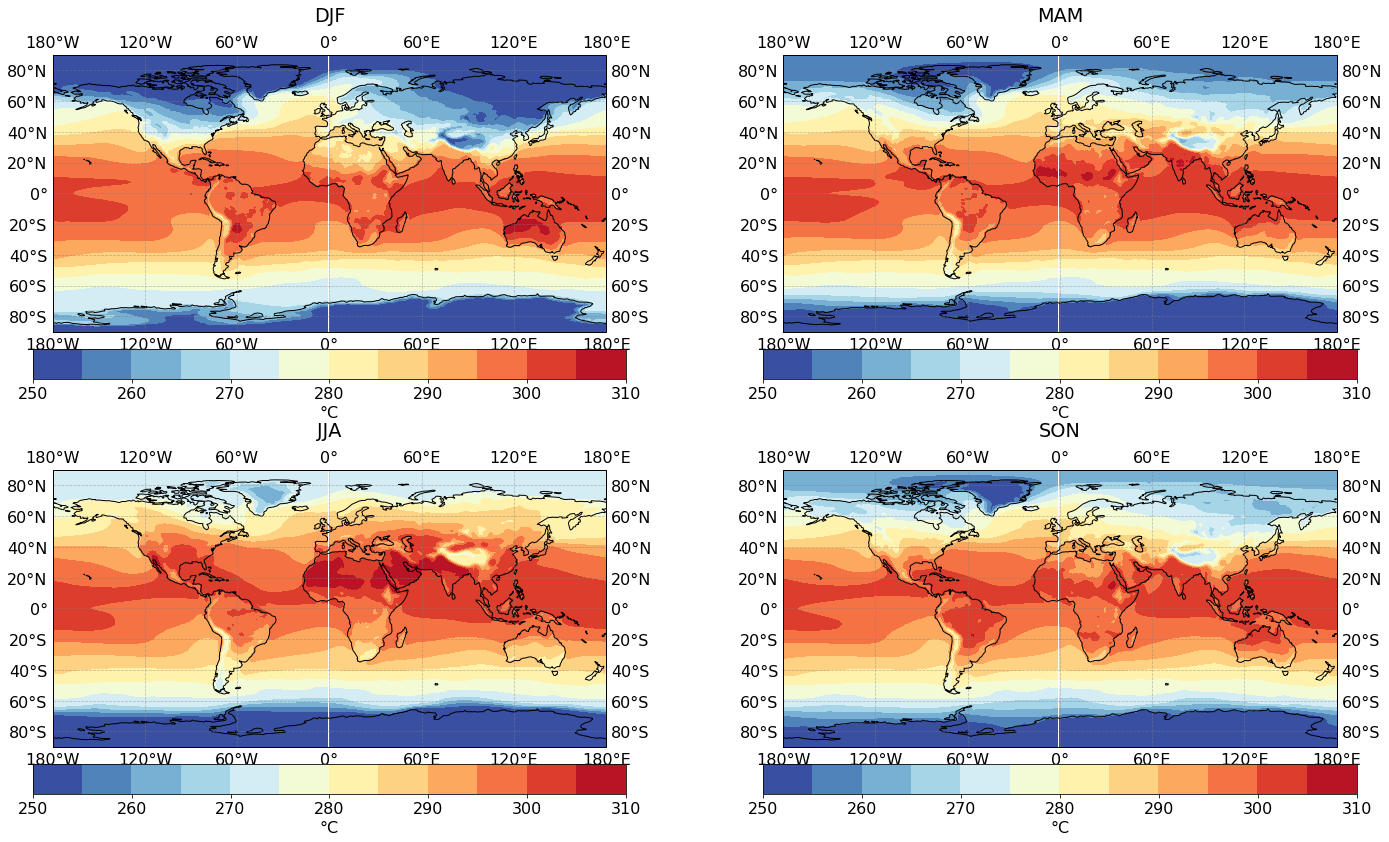

In [5]:
plt.rcParams.update({'font.size': 16})  # change the font size
tas_seasonal = surface_temperature['tas'].groupby('time.season').mean() # group by season (DJF, MAM, JJA, SON) and take the (seasonal) mean
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,14), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    seas_data = tas_seasonal.sel(season=season) # select teh season we want
    seas_data = seas_data.where(seas_data > 250, 250) # replace values where ann_mean > 250 K is False (i.e. ann_mean < 250) with 250 (remove low outliers)
    seas_data = seas_data.where(seas_data < 310, 310) # replace values where ann_mean < 310 K is False (i.e. ann_mean > 310) with 310 (remove high outliers)
    cylindrical_equidistant_projection(surface_temperature['lat'],surface_temperature['lon'],seas_data,np.arange(250,310.00001,5),np.arange(250,320,10),cmap='RdYlBu_r',c_label='°C',title=season,fig=fig,ax=axes.flatten()[i]) # plot

**Describe differences across each season.**

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>

#### Now, let's examine a single year of zonal winds:

In [6]:
filepath = 'ua_Amon_CESM2_01_12_1981_2012.nc' # choose the file
zonal_wind = xr.open_dataset(filepath)
zonal_wind

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 288, plev: 19, time: 12)
Coordinates:
  * time      (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * plev      (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 ...
    lat_bnds  (lat, bnds) float64 ...
    ua        (time, plev, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.7.1 (http://mp...
    history:                Tue Sep 22 16:45:35 2020: cdo -ymonmean /export/d...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:         

You'll note the data in `zonal_wind` is now defined over coordinates `lat, lon, time, plev` and the data variable we want is `ua`. We can access this variable with  `zonal_wind['ua']`.

#### Now let's plot annual-mean zonal-mean surface temperature, and describe it:

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


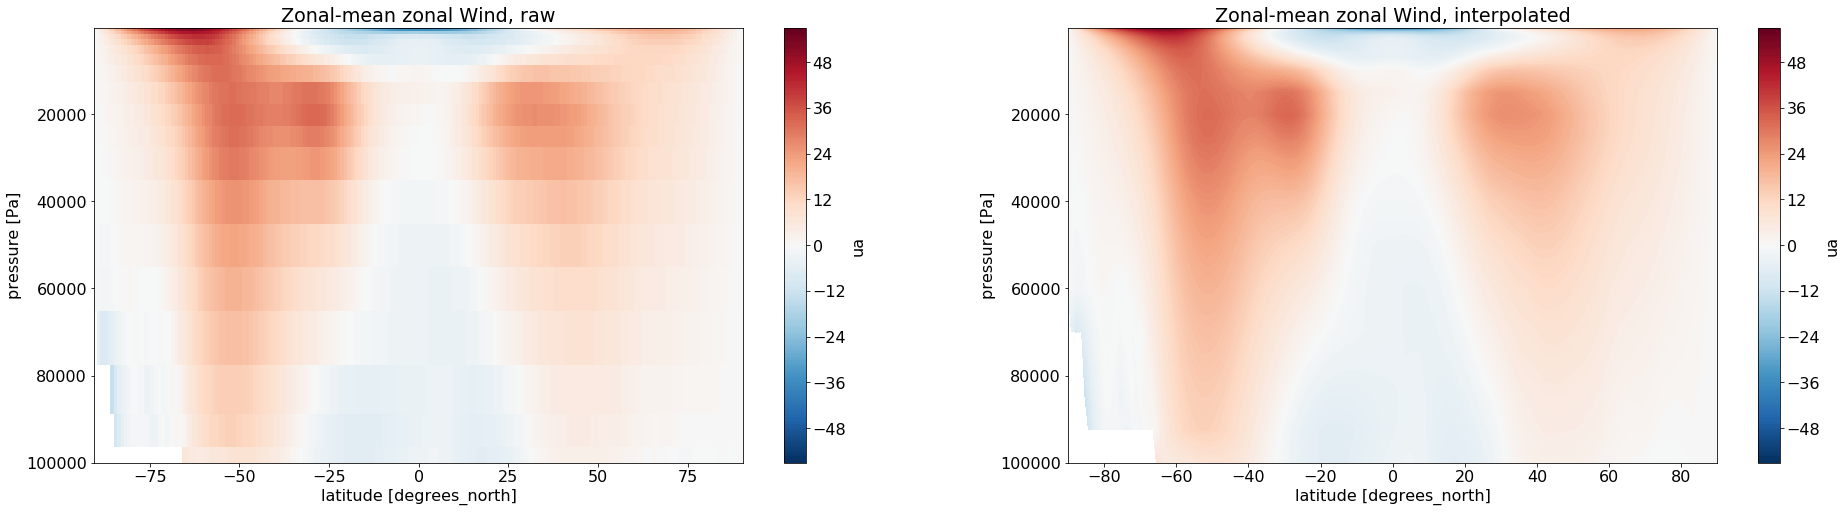

In [7]:
plot_data = zonal_wind['ua'].mean(['time','lon'])          # take the time mean and mean over longitudes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32,8)) # creat a figure with a 1x2 grid of subplots
axes_list = axes.flatten() # get a list of the axes

# we plot the data on each axis, with 200 levels in the colorbar, and y axis limits taken from the plev dimension.
# Note plot_data['plev'] and plot_data.plev both work, and we are going from max to min, i.e. a reversed from typical y axis
plot_data.plot(         ax=axes_list[0],levels=200,ylim=[plot_data.plev.max(),plot_data.plev.min()]) # plot the data
plot_data.plot.contourf(ax=axes_list[1],levels=200,ylim=[plot_data.plev.max(),plot_data.plev.min()])
_=axes_list[0].set_title('Zonal-mean zonal Wind, raw')      # title each plot
_=axes_list[1].set_title('Zonal-mean zonal Wind, interpolated') # title each plot

**What patterns do you see in the data? At what level of the atmosphere are winds strongest? Why is this?**
- Note red (positive) winds are westerlies (from the west, going east), while blue is the opposite
- Note also we've plotted both interpolated and uninterpolated data. It is good practice when creating plots to think about what data plot format implies about the resolution and amount of  underlying data.

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>

#### Now we will examine a similar dataset, but for temperature:

In [8]:
# Load the data
filepath = 'ta_Amon_CESM2_01_12_1981_2012.nc'
temperature = xr.open_dataset(filepath,decode_cf=True)

You'll note the data in `temperature` is stored in the same format as `zonal wind`. Now the data variable we want is `ta`. We can access this variable with  `temperature['ta']`.

#### Now we will plot the data on both logarithmic nad linear vertical scales:

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


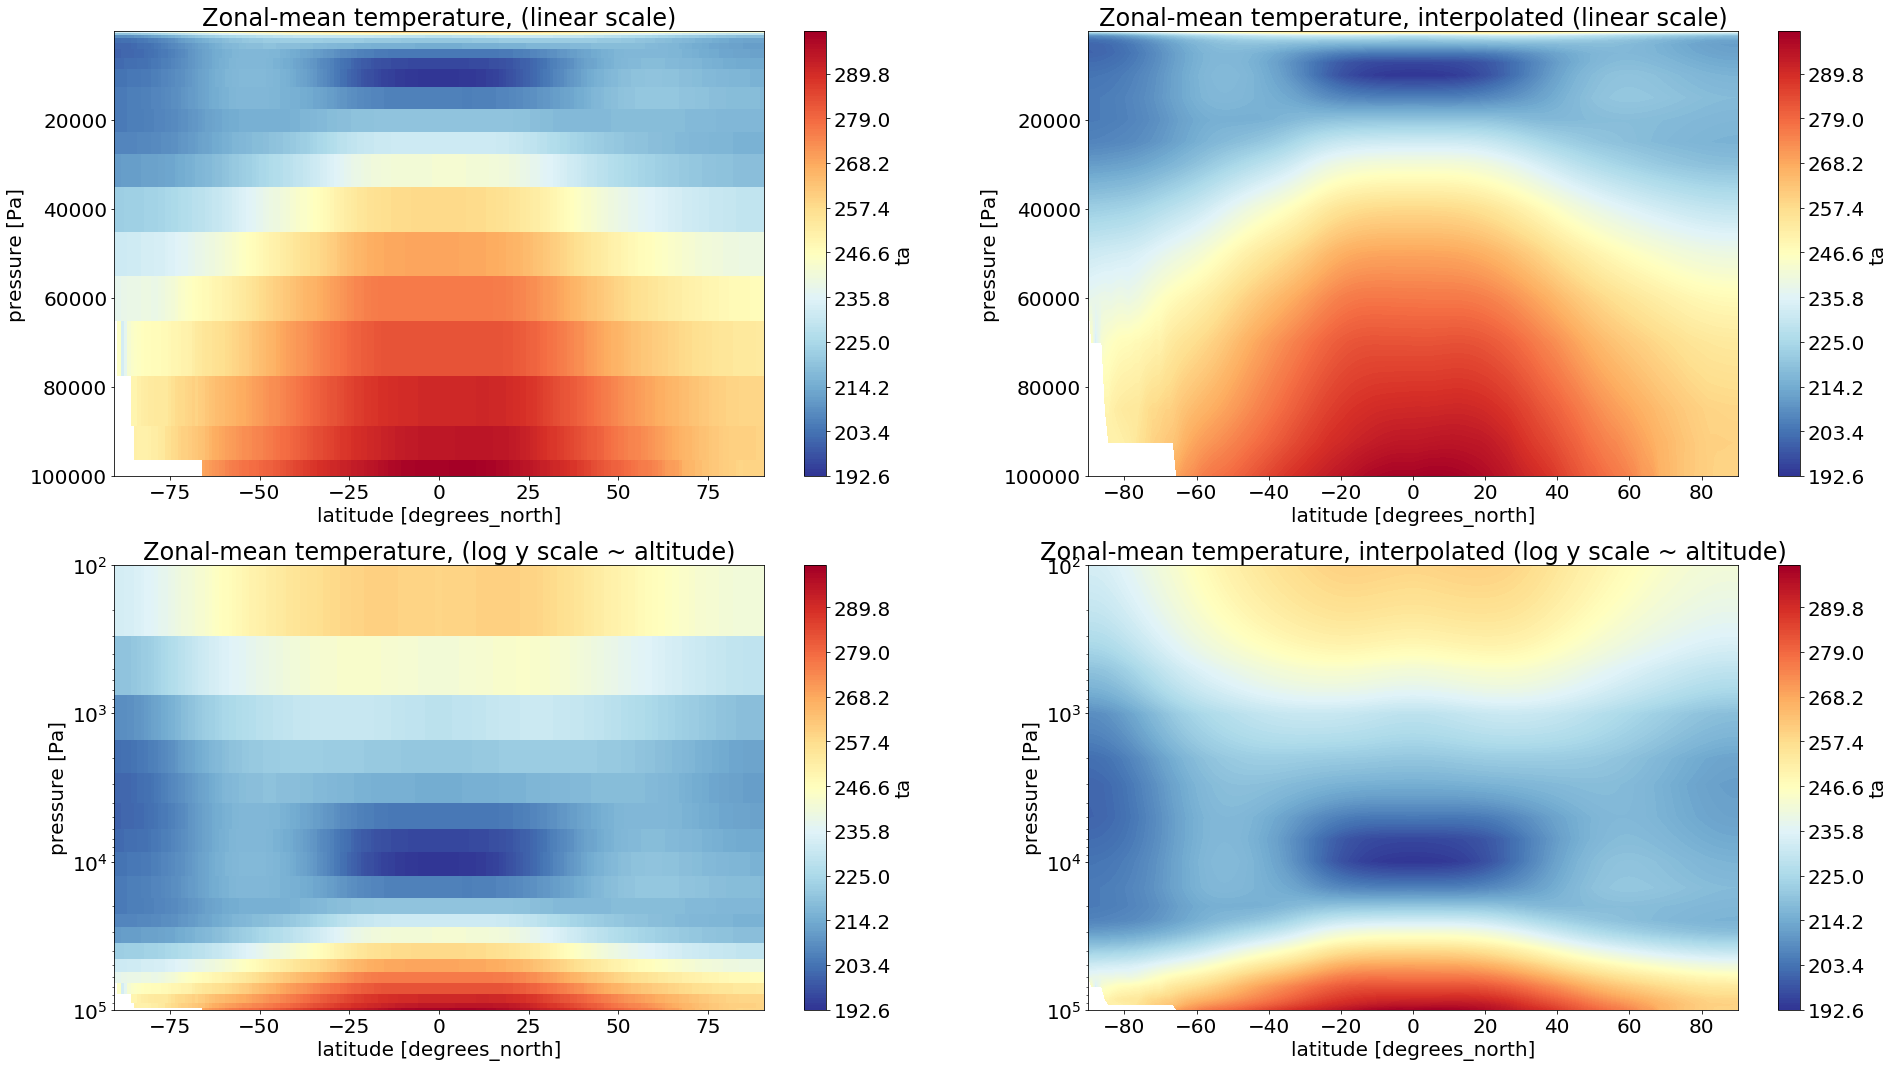

In [9]:
plt.rcParams.update({'font.size': 20})
plot_data = temperature['ta'].mean(['time','lon'])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(32,18))
axes_list = axes.flatten()
plot_data.plot(         ax=axes_list[0],levels=200,cmap='RdYlBu_r'             ,ylim=[plot_data.plev.max(),plot_data.plev.min()]) # uninterpolated data, default (linear) scale
plot_data.plot.contourf(ax=axes_list[1],levels=200,cmap='RdYlBu_r'             ,ylim=[plot_data.plev.max(),plot_data.plev.min()]) #   interpolated data, default (linear) scale
plot_data.plot(         ax=axes_list[2],levels=200,cmap='RdYlBu_r',yscale='log',ylim=[plot_data.plev.max(),plot_data.plev.min()]) # uninterpolated data, logarithmic scale
plot_data.plot.contourf(ax=axes_list[3],levels=200,cmap='RdYlBu_r',yscale='log',ylim=[plot_data.plev.max(),plot_data.plev.min()]) #   interpolated data, logarithmic scale
_=axes_list[0].set_title('Zonal-mean temperature, (linear scale)')
_=axes_list[1].set_title('Zonal-mean temperature, interpolated (linear scale)')
_=axes_list[2].set_title('Zonal-mean temperature, (log y scale ~ altitude)')
_=axes_list[3].set_title('Zonal-mean temperature, interpolated (log y scale ~ altitude)')

Plotting on a logarithmic scale can help us get better context about the vertical structure of the atmosphere. Atmospheric pressure is related to altitude by the exponential decay formula:
$$ P = P_{\text{sfc}} \;e^{-z/H} $$
for a scale height $H = RT/g \approx 8\text{ km}$. Thus, we can say for our logarithmic y axis:
$$ y =  \ln(P)   = -z/H -  P_{\text{sfc}} $$
that is to say that the y axis is proportional to (not equal to) altitude, up to some additive constant i.e:
$$ y = \ln(P) \propto z $$
**What patterns do you see in the data? How does changing the vertical scale impact?**
- Note that the resolution of the model decreases with altitude (z - It displays a much more unclear pattern in pressure given the exponential decay described above). Why do you think this is?
- How does the position of the winds we plotted before align with those of the temperatures we plotted now? (are the winds aligned with temperature maxima, minima, or gradients?

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>

### Now, we will calculate the global-mean temperature.
To do this we need to take the area-weighted mean. Because the earth is spherical, data points as high latitudes describe less area than data points at low latitudes. The proper latitude ($\phi$) weighting is:
$$\text{weight} = \cos(\phi) $$
If we do not weight correctly, we may overreppresent high latitude areas that are cold but take up little area, decreasing the global-mean temperature. See http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html

Xarray can perform the weighting automatically:

In [10]:
weight = np.cos(np.deg2rad(temperature['lat']))           # convert degrees to radians and calculate the weights using the full xarray lat object. Using the full ojbect and all its metadata is impoprtant!
temperature_weighted = temperature['ta'].weighted(weight) # calculate a weighted mean object in xarray ()
temperature_weighted # note this prints out a weighted object

AttributeError: 'DataArray' object has no attribute 'weighted'

We may also assume we can do this calculation ourselves. A naive implementation is the calculate the weights from the latitudes as before, and then multiply our data by the weights along the latitude axis ourselves. <br>
Such an implementation may go as follows. We find the dimension of latitude in our temperature data array:

In [ ]:
temperature['ta'].dims

We see from running the cell above that the right index is 2 (note python is zero indexed so `lat` is in the 2nd index position. <br>
Now we:
- align our latitude data along the second dimension
- multiply our data by the weights (note we normalize the weights by their sum so that $
\sum{\text{(normalized weights)}} = 1$ and the global mean magnitude is correct.

In [ ]:
lat_data = temperature['lat'].data      # Take the underlying data from the latitude array
lat_data = lat_data.reshape(1,1,-1,1)   # The lat dimension is 2, so reshape our vector so it is aligned correctly
weight2  = np.cos(np.deg2rad(lat_data)) # Calculate our weights...
weight2  = weight2/np.sum(weight2)      # ... and normalize them
temperature_weighted_2 = temperature['ta'] * weight2 # apply the weights to the data

This implementation, however, despite its simplicity, is incorrect! <br>

Note in the previous 2 plots the white area at the surface in the southern hemisphere. This is missing data. It occurs because the surface in Antarctica is so elevated that the pressure at the surface there is higher than that at the bottom of our y/pressure axis. This is only visible at low latitudes where antartica spans all longitudes, but high elevation regions across the globe such as the Himalayas would display a similar issue! <br>

Thus, our normalization is a little bit off, we should only consider weights for data we actually have.
It seems we'll have to be a bit more precise with our calculation...

A more thorough implementation may go as follows:
- align our data along the correct (2nd) dimension (already done!)
- broadcast it to match the size of our tempearture data, (i.e. expand by repetition so it matches the size of the temperature data)
- drop weights in the areas where temperature data is missing
- normalize along the latitude dimension (2) based on the weights that remain

This is implemented below. I encourage you to pull out any variable and examine it to help you understand what is going on. For example, one might examine <br>
`temperature['lat'].shape, lat_data.shape, lat_data_grid.shape` to see their respective shapes.

In [ ]:
lat_data_grid = np.broadcast_to(lat_data,temperature['ta'].shape) # use numpy native broadcasting to get a latitude array the same shape as our tempearture data
valid    = ~np.isnan(temperature['ta'])                           # valid is only where the temperature data is not nan, i.e. it actually exists
weights3  = np.cos(np.deg2rad(lat_data_grid))                      # take the cosine of latitude as the weights
weights3 = weights3 * valid                                       # multiply by our validity array, to set the value of weights where data is missing to 0 (i.e. ignore this data/weight)
weights3  = weights3/np.sum(weights3,axis=2)                         # sum along the second/latitude axis for normalization
temperature_weighted_3 = temperature['ta'] * weights3              # apply the weights to the data

Now we can calculate some global means. We have to be a little careful with our weights. The definition of a weighted mean is:
$$ \left<x\right>_w = \frac{\sum w_i x_i}{\sum w_i} = \sum x_i \frac{ w_i }{\sum w_i}$$
and we have calculated by multiplication:
$$ \left<x\right>_w = x_i \frac{ w_i }{\sum w_i} $$
So the only remaining operation is a sum. <br>

We calculate and plot our 3 methods of doing this calculation below:

In [ ]:
fig = plt.figure(figsize=(8, 12)) # assign a vertically tall figure
ax  = plt.axes()                  # assign axes to the figure
plot_data     = temperature_weighted.mean(['lat','lon','time']).transpose()         # take the mean over latitude, longitude, and time leaving only a vertical profile
plot_data_2 = temperature_weighted_2.sum(['lat']).mean(['lon','time']).transpose()  # for latitude, we only have the sum as described above, and then a mean over lat and time to leave a vertical profile
plot_data_3 = temperature_weighted_3.sum(['lat']).mean(['lon','time']).transpose()  # for latitude, we only have the sum as described above, and then a mean over lat and time to leave a vertical profile
 
plot_data.plot(  ax=ax, y='plev',yscale='log',ylim=[plot_data.plev.max()  ,plot_data.plev.min()  ],linewidth=10,              color='cyan' , label='xarray'  ) # plot profile, log scale, width 10, color cyan,  label as xarray
plot_data_2.plot(ax=ax, y='plev',yscale='log',ylim=[plot_data_2.plev.max(),plot_data_2.plev.min()],                           color='black', label='method 1') # plot profile, log scale,           color black, label as method 1
plot_data_3.plot(ax=ax, y='plev',yscale='log',ylim=[plot_data_3.plev.max(),plot_data_3.plev.min()],linestyle='--',linewidth=3,color='r'    , label='method 2') # plot profile, log scale, width 3,  color red,   label as method 2
_ = ax.legend() # you see the problems at the bottom from some missing data

Thankfull, we see our second method matches the native xarray method! The first, however, is incorrect, primarily because it assigned positive weights to missing data decreasing the total value of our averages. <br>
This can teach us a few important lessons:
- We should always be very careful with our calculations and be aware of what our data actually contains to avoid careless errors such as the one we might have made here
- **Perhaps more importantly, it is generally better to use trusted official libraries and packages to perform calculations rather than write your own.**

**What interesting features do you see in the correct profiles? Where is the tropopause?**

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>

#### Now let's examine the annual temperature cycle at the lowest model level:
We use xarray's native weighting and then take a mean over the `lat` and `lon` dimensions. Then we use index selection `isel` to select the lowest elevation pressure level.

In [ ]:
fit = plt.figure(figsize=(15, 5)) # create a figure
ax  = plt.axes()                  # attach axes
plot_data     = temperature_weighted.mean(['lat','lon']).isel(plev=0).transpose()
plot_data.plot(  ax=ax, label='xarray') # plot the data
_ = ax.legend()

**Is there an annual cycle in temperature, and if so, why? (Hint: How large is the variability in this plot compared the annual cycle of temperatures in any individual location?)**

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>

#### Now, let's return to our vertical profiles and see what the temperature looks like in a selection of locations around the world.
First, we prepare our data by selecting data nearest to the coordinates of our locations:

In [ ]:
# get the coordinates of some locations
coords = {'Los Angeles'      : [34.05349 , 241.75468], # [ lat, lon]
          'Mt. Everest'      : [27.988056, 86.92528 ],
          'South Pole'       : [-90.0    , 0        ],
          'Tropical Pacific' : [0        , 180      ]
         }
# reate a dictionary of data and fill it with data
data ={}
for location,coordinates in coords.items(): # loop over the name,value pairs in our coordinate dictionary
    data[location] = temperature['ta'].sel(lat=coordinates[0],lon=coordinates[1],method='nearest') # select the data nearest to our location coordinates
    
# Create a colormap that cycles between cold to warm colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = cmap = LinearSegmentedColormap.from_list("mycmap", [[0,0,1],[0,1,.5],[1,0,0],'yellow',[0,0,1]],N=13)
colors = cmap(np.linspace(0, 1, 13)[0:12])

months = np.array(temperature.time.dt.month) # get month numbers from our dataset
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # get names for our datasets

Now that we've prepared the data, we can plot it. We'll plot it by month so we can see the annual cycle:

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(32,32)) # prepare our 2x2 grid of subplots in side our figure
axes_list = axes.flatten()             # get a list of axes from the flattening the 2x2 grid to a 1x4 list
plt.rcParams.update({'font.size': 20}) # set font size

for i,location in enumerate(data.keys()): # iterate over our data and its index using enumerate
    for month in months:
        plot_data = data[location].isel(time=month-1) # months are not zero indexed, but python is, so we use index month-1 to access that months data
        plot_data.plot(ax= axes_list[i], y='plev',yscale='log',ylim=[plot_data.plev.max()  ,plot_data.plev.min()  ],color=colors[month-1],label=month_names[month-1]) # plot the data, yscale log, and color and label it using the colors and names described in the previous cell
    axes_list[i].set_title(location) # title iwth the location
    axes_list[i].legend(fontsize=20) # add a legend to show the months

**What sort of patterns do you see in the data?** <br>
It is okay to be broad or vague here, we don't expect you to necessarily know what to look for! Some ideas might include:
- How does the surface temperature compare with your expectation of cold and warm regions across the globe? 
- How large is the annual cycle? At the surface? Aloft? What months are warm? What months are cold?
 - If you have any insight into why these variations might occur, feel free to provide them, if not that's okay! We'll go over some of this in recitation and office hours
- Is the rate of change of temperature with height a constant? (This is a log pressure scale, i.e. proportional to altitude, so in the troposphere the answer should be yes!)
 - If you're particularly observant, you'll note a slight increase in the lapse rate $\left(\frac{\partial T}{\partial z}\right)$ in the upper vs lower troposphere. <br> This is particularly visible in the tropical atmosphere. Why might this exist?
- How does the location of the tropopause vary with location? How does this compare with the zonal-mean cross section maps of temperature we made earlier?

### <b> Answer: </b>

<div class="alert alert-block alert-warning">

</div>